# Logical modeling of cPLA2-induced inflammation upon activation of immune system receptors

This notebook is created for the reproducible analysis of the cPLA2 model using the software tools developed by the Colomoto Consortium. 

### Imports and model loading with GINsim
The first thing to do is to import the necessary tools for performing our analysis.

In [1]:
import ginsim 
import biolqm
import maboss
import pypint
from colomoto_jupyter import tabulate
from colomoto.temporal_logics import *
from itertools import combinations
from functools import reduce

import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame

This notebook has been executed using the docker image `colomoto/colomoto-docker:2020-01-24`

## The core cPLA2 network

### Load and visualize network

In [2]:
lrg = ginsim.load("2020May18_DT.zginml")

### Identification of attractors (bioLQM)

In [3]:
'''Convert ginsim model to a biolqm compliant model '''
lqm = ginsim.to_biolqm(lrg)

### Visualization of attractors

We visualise each stable state obtained in a graph that highlights the active components (yellow nodes) and the trajectories (blue arcs) taken with a GINsim function. 

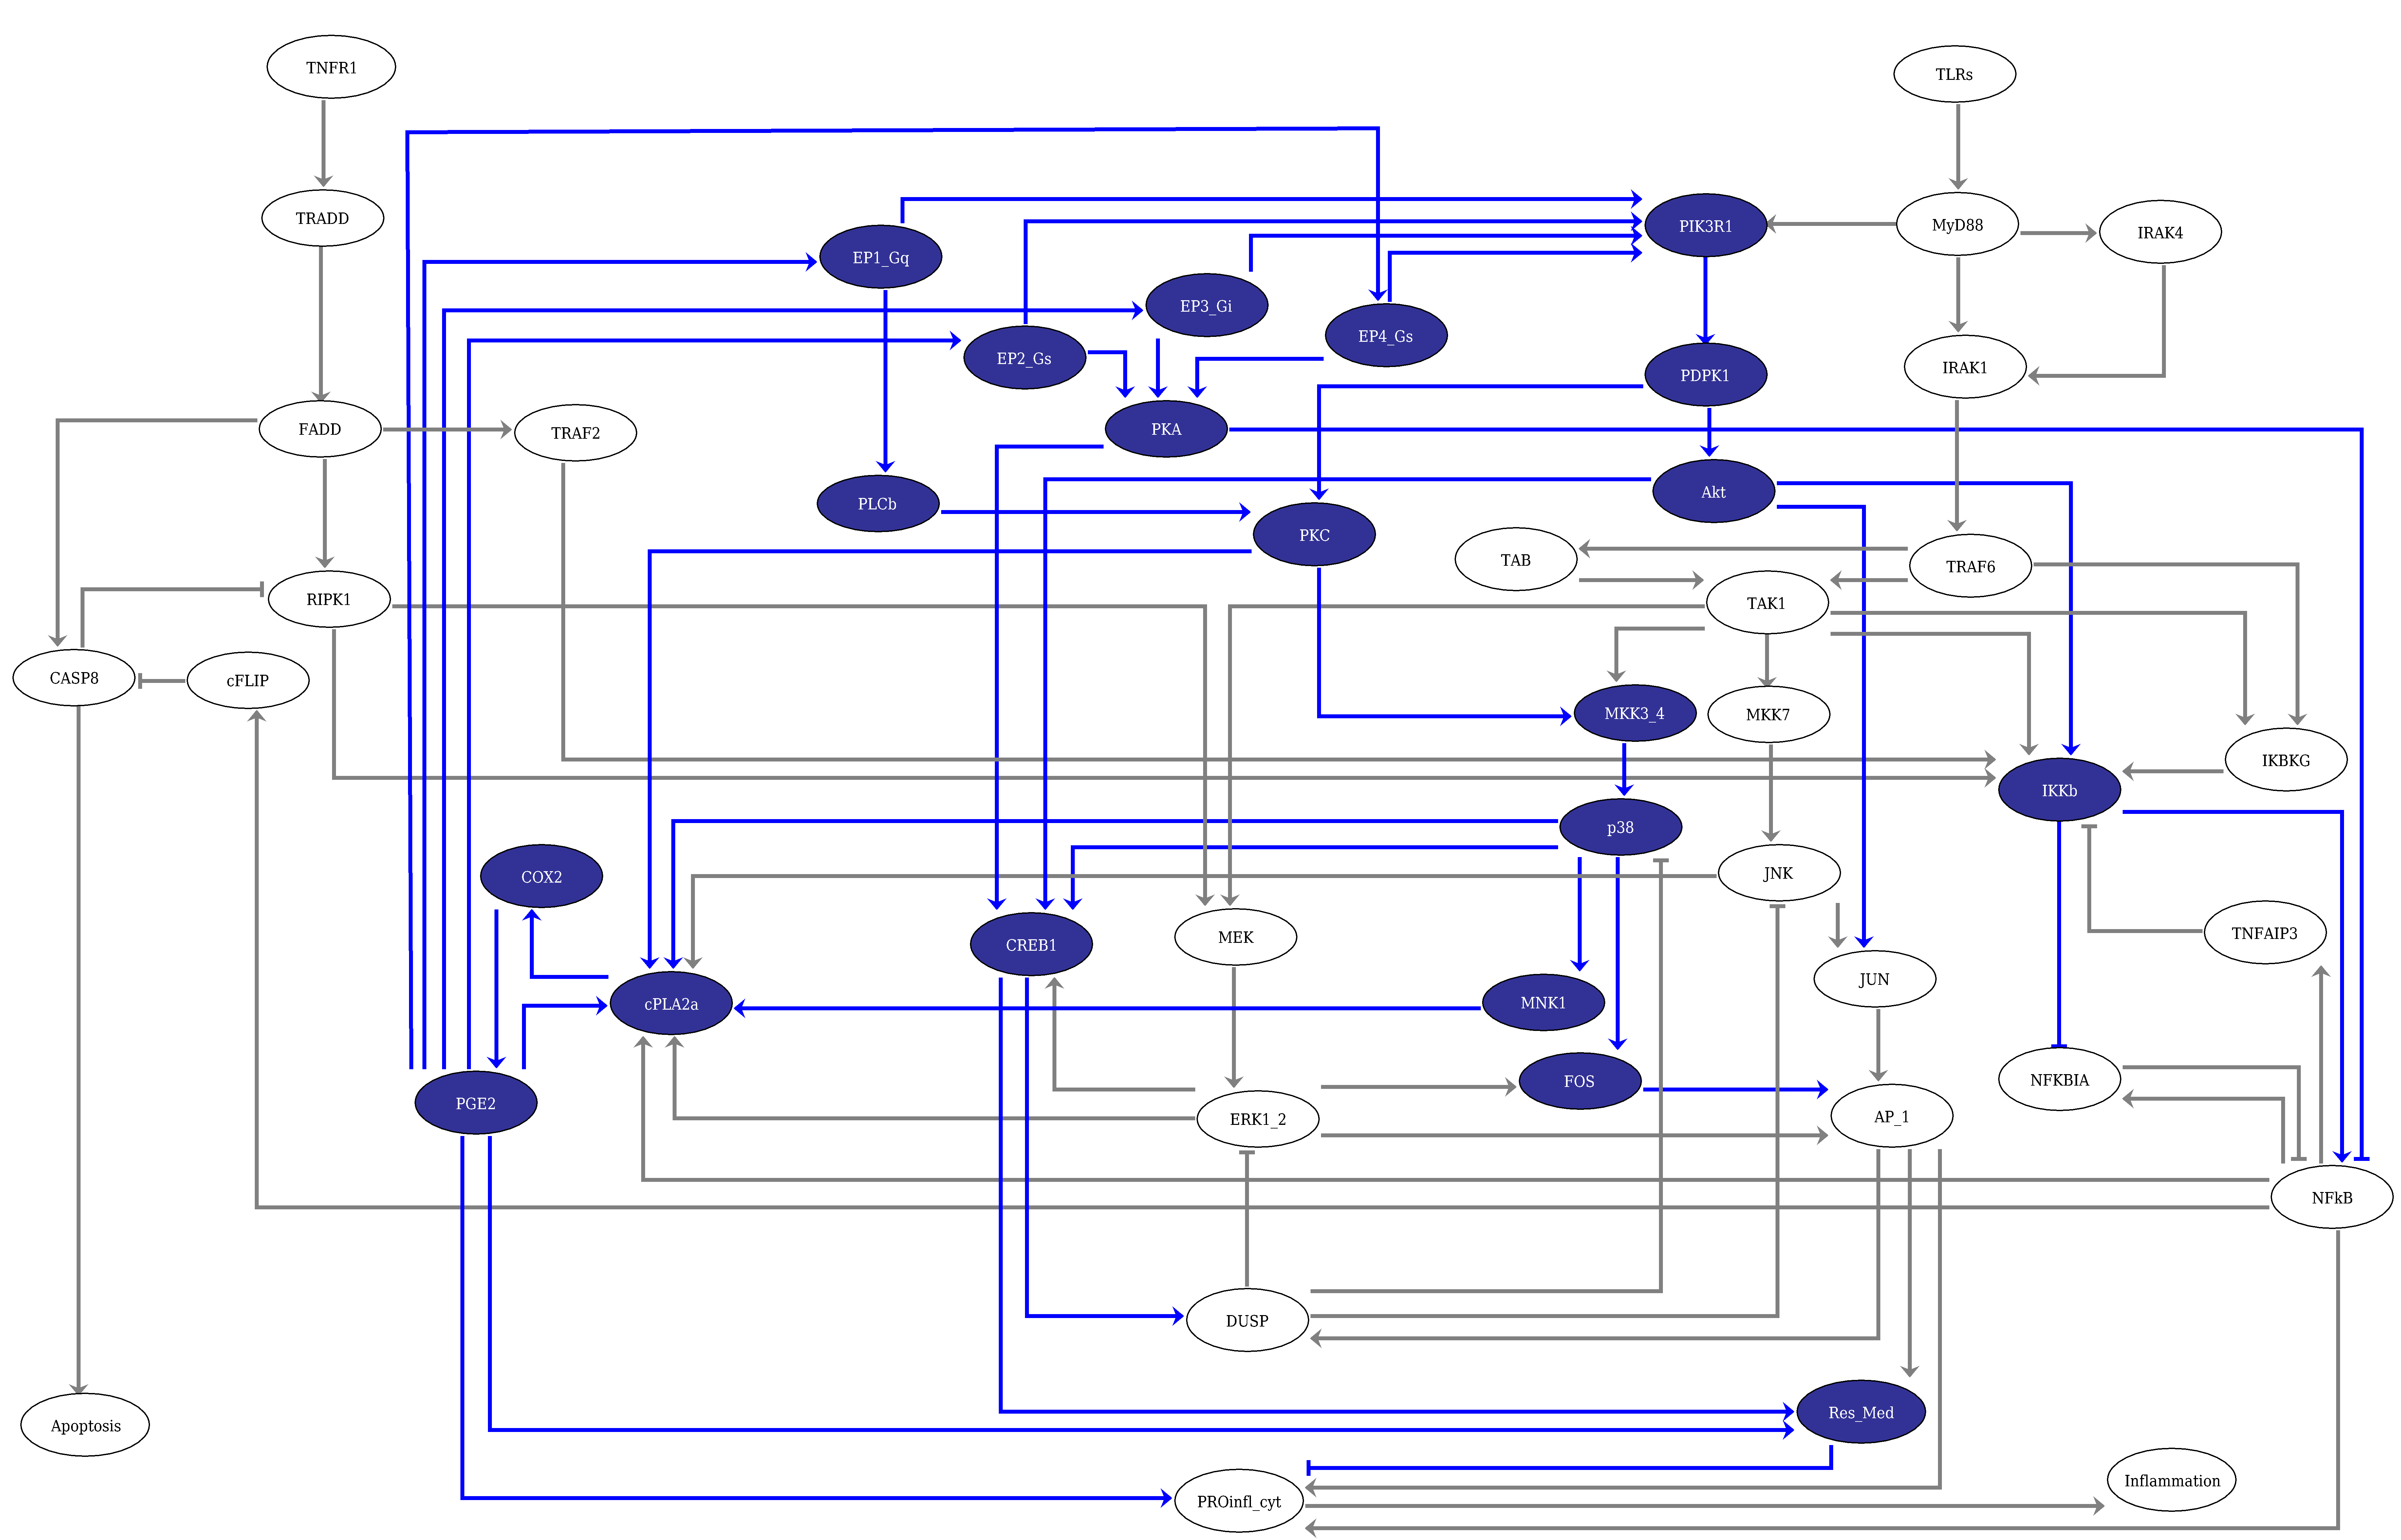

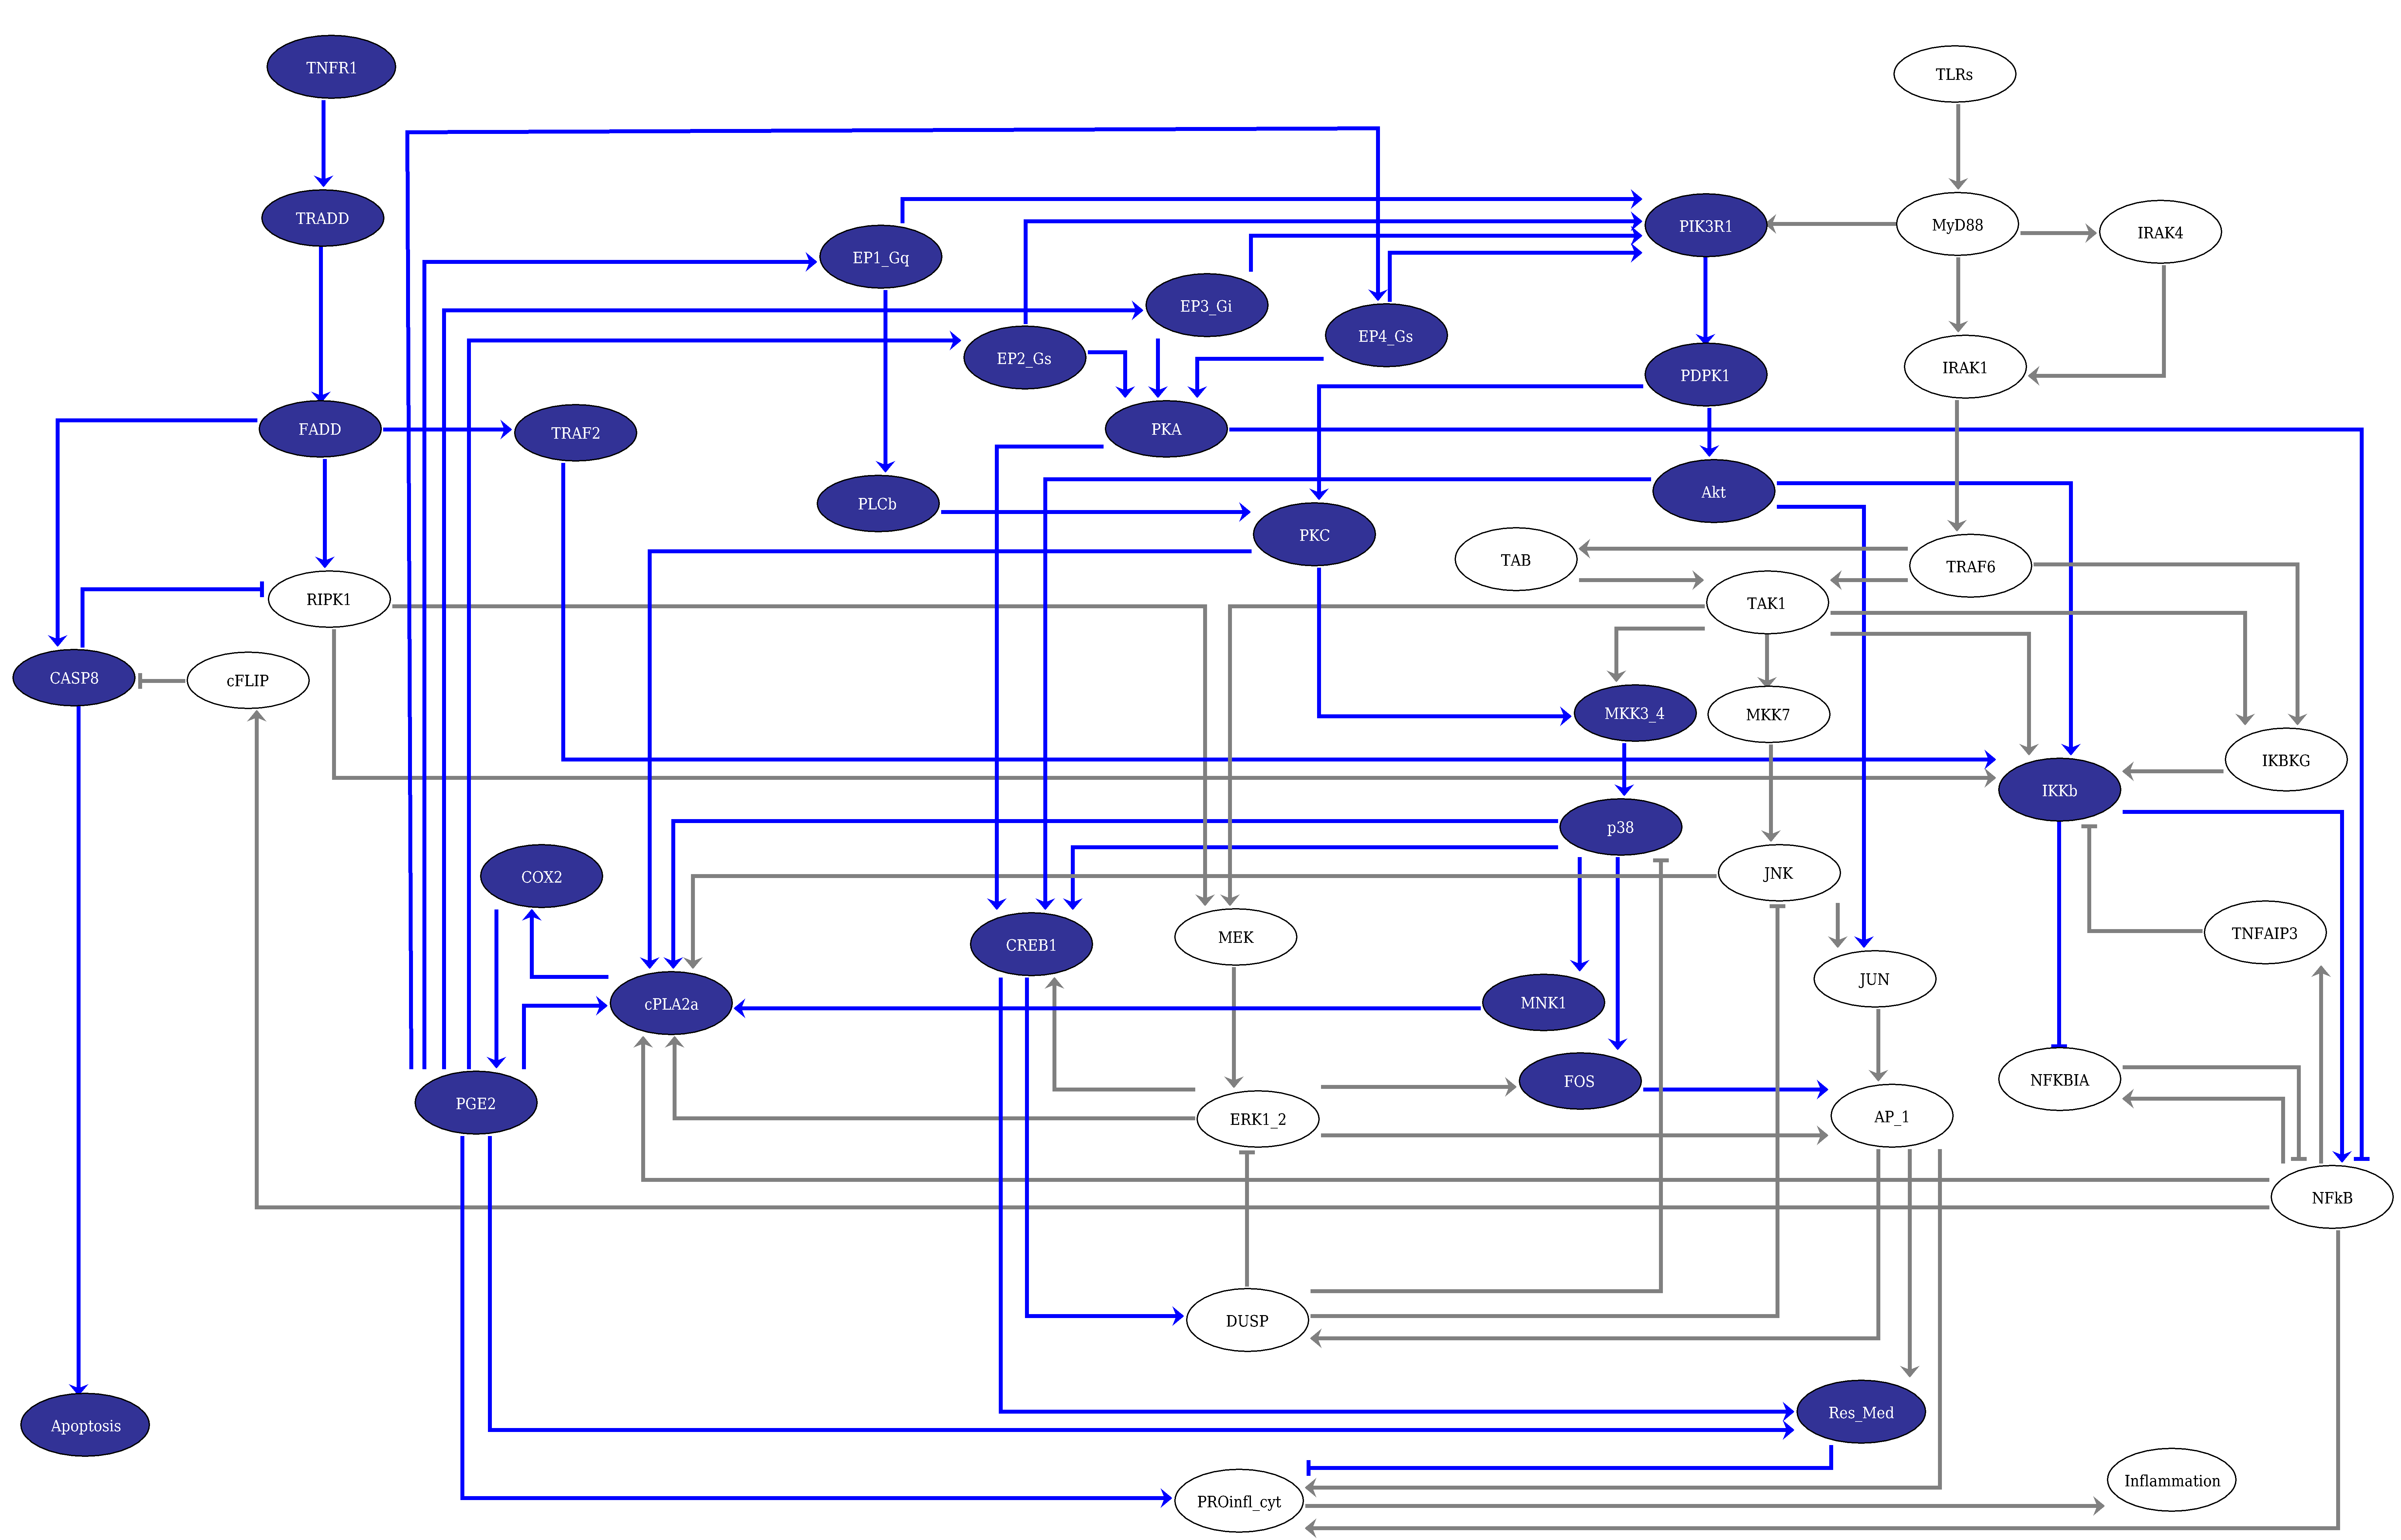

In [4]:
'''Compute stable states'''
fixpoints = biolqm.fixpoints(lqm)
tabulate(fixpoints)

'''Visualisation'''
sys.displayhook((ginsim.show(lrg, fixpoints[0])))
sys.displayhook((ginsim.show(lrg, fixpoints[1])))

The model is able to reach two pre-defined states, representing two alternative cell fates; resolution of inflammation and apoptosis. 

As a next step the trap spaaces were calculated, in order to identify cyclic attractors from which the model cannot escape (*ref* [Zanudo 2013](https://arxiv.org/abs/1304.3467) and [Klarner 2014](https://link.springer.com/chapter/10.1007/978-3-319-11520-7_59)). At trap spaces, some of the model's components will have a fixed value while other will oscilate. As inflammation is a dynamic process and contains multiple feedback loops, we expect that state to represented as a trap space. 

In [5]:
'''Compute trap space analysis'''
traps = biolqm.trapspace(lqm)
tabulate(traps)

<table>
<thead>
<tr><th style="text-align: right;">  </th><th style="text-align: right;">  TNFR1</th><th style="text-align: right;">  TLRs</th><th style="text-align: right;">  MyD88</th><th style="text-align: right;">  IRAK1</th><th style="text-align: right;">  IRAK4</th><th style="text-align: right;">  TRAF6</th><th style="text-align: right;">  TAB</th><th style="text-align: right;">  TAK1</th><th style="text-align: right;">  IKKb</th><th style="text-align: right;">  NFKBIA</th><th style="text-align: right;">  IKBKG</th><th style="text-align: right;">  NFkB</th><th style="text-align: right;">  TNFAIP3</th><th style="text-align: right;">  MKK3_4</th><th style="text-align: right;">  MKK7</th><th style="text-align: right;">  MEK</th><th style="text-align: right;">  p38</th><th style="text-align: right;">  ERK1_2</th><th style="text-align: right;">  JNK</th><th style="text-align: right;">  DUSP</th><th style="text-align: right;">  MNK1</th><th style="text-align: right;">  PIK3R1</th><th style="text-align: right;">  PDPK1</th><th style="text-align: right;">  Akt</th><th style="text-align: right;">  PKC</th><th style="text-align: right;">  AP_1</th><th style="text-align: right;">  FOS</th><th style="text-align: right;">  JUN</th><th style="text-align: right;">  CREB1</th><th style="text-align: right;">  PLCb</th><th style="text-align: right;">  PKA</th><th style="text-align: right;">  cPLA2a</th><th style="text-align: right;">  COX2</th><th style="text-align: right;">  PGE2</th><th style="text-align: right;">  EP1_Gq</th><th style="text-align: right;">  EP2_Gs</th><th style="text-align: right;">  EP3_Gi</th><th style="text-align: right;">  EP4_Gs</th><th style="text-align: right;">  PROinfl_cyt</th><th style="text-align: right;">  Inflammation</th><th style="text-align: right;">  Res_Med</th><th style="text-align: right;">  RIPK1</th><th style="text-align: right;">  TRADD</th><th style="text-align: right;">  TRAF2</th><th style="text-align: right;">  FADD</th><th style="text-align: right;">  CASP8</th><th style="text-align: right;">  cFLIP</th><th style="text-align: right;">  Apoptosis</th></tr>
</thead>
<tbody>
<tr><td style="text-align: right;"> 0</td><td style="text-align: right;">      1</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     1</td><td style="text-align: right;">       0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">        0</td><td style="text-align: right;">       1</td><td style="text-align: right;">     0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">       0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     1</td><td style="text-align: right;">       1</td><td style="text-align: right;">      1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">     0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    0</td><td style="text-align: right;">      1</td><td style="text-align: right;">     1</td><td style="text-align: right;">    1</td><td style="text-align: right;">       1</td><td style="text-align: right;">     1</td><td style="text-align: right;">     1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">            0</td><td style="text-align: right;">             0</td><td style="text-align: right;">        1</td><td style="text-align: right;">      0</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">     1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      0</td><td style="text-align: right;">          1</td></tr>
<tr><td style="text-align: right;"> 1</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">   254</td><td style="text-align: right;">     254</td><td style="text-align: right;">      0</td><td style="text-align: right;">   254</td><td style="text-align: right;">      254</td><td style="text-align: right;">       0</td><td style="text-align: right;">     0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">       0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     0</td><td style="text-align: right;">       0</td><td style="text-align: right;">      0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">    0</td><td style="text-align: right;">       0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     0</td><td style="text-align: right;">       0</td><td style="text-align: right;">       0</td><td style="text-align: right;">       0</td><td style="text-align: right;">       0</td><td style="text-align: right;">            0</td><td style="text-align: right;">             0</td><td style="text-align: right;">        0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">    254</td><td style="text-align: right;">          0</td></tr>
<tr><td style="text-align: right;"> 2</td><td style="text-align: right;">      1</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">   254</td><td style="text-align: right;">     254</td><td style="text-align: right;">      0</td><td style="text-align: right;">   254</td><td style="text-align: right;">      254</td><td style="text-align: right;">       0</td><td style="text-align: right;">     0</td><td style="text-align: right;">  254</td><td style="text-align: right;">    0</td><td style="text-align: right;">     254</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     0</td><td style="text-align: right;">       0</td><td style="text-align: right;">      0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">   254</td><td style="text-align: right;">  254</td><td style="text-align: right;">    0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">    0</td><td style="text-align: right;">       0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     0</td><td style="text-align: right;">       0</td><td style="text-align: right;">       0</td><td style="text-align: right;">       0</td><td style="text-align: right;">       0</td><td style="text-align: right;">          254</td><td style="text-align: right;">           254</td><td style="text-align: right;">      254</td><td style="text-align: right;">    254</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">     1</td><td style="text-align: right;">    254</td><td style="text-align: right;">    254</td><td style="text-align: right;">        254</td></tr>
<tr><td style="text-align: right;"> 3</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     1</td><td style="text-align: right;">       0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">        0</td><td style="text-align: right;">       1</td><td style="text-align: right;">     0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">       0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     1</td><td style="text-align: right;">       1</td><td style="text-align: right;">      1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">     0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    0</td><td style="text-align: right;">      1</td><td style="text-align: right;">     1</td><td style="text-align: right;">    1</td><td style="text-align: right;">       1</td><td style="text-align: right;">     1</td><td style="text-align: right;">     1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">            0</td><td style="text-align: right;">             0</td><td style="text-align: right;">        1</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">          0</td></tr>
<tr><td style="text-align: right;"> 4</td><td style="text-align: right;">      0</td><td style="text-align: right;">     1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">    1</td><td style="text-align: right;">     1</td><td style="text-align: right;">     1</td><td style="text-align: right;">     254</td><td style="text-align: right;">      1</td><td style="text-align: right;">   254</td><td style="text-align: right;">      254</td><td style="text-align: right;">       1</td><td style="text-align: right;">     1</td><td style="text-align: right;">    1</td><td style="text-align: right;">  254</td><td style="text-align: right;">     254</td><td style="text-align: right;">  254</td><td style="text-align: right;">   254</td><td style="text-align: right;">   254</td><td style="text-align: right;">       1</td><td style="text-align: right;">      1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">   254</td><td style="text-align: right;">  254</td><td style="text-align: right;">  254</td><td style="text-align: right;">    254</td><td style="text-align: right;">   254</td><td style="text-align: right;">  254</td><td style="text-align: right;">     254</td><td style="text-align: right;">   254</td><td style="text-align: right;">   254</td><td style="text-align: right;">     254</td><td style="text-align: right;">     254</td><td style="text-align: right;">     254</td><td style="text-align: right;">     254</td><td style="text-align: right;">          254</td><td style="text-align: right;">           254</td><td style="text-align: right;">      254</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">    254</td><td style="text-align: right;">          0</td></tr>
<tr><td style="text-align: right;"> 5</td><td style="text-align: right;">      1</td><td style="text-align: right;">     1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">    1</td><td style="text-align: right;">     1</td><td style="text-align: right;">     1</td><td style="text-align: right;">     254</td><td style="text-align: right;">      1</td><td style="text-align: right;">   254</td><td style="text-align: right;">      254</td><td style="text-align: right;">       1</td><td style="text-align: right;">     1</td><td style="text-align: right;">    1</td><td style="text-align: right;">  254</td><td style="text-align: right;">     254</td><td style="text-align: right;">  254</td><td style="text-align: right;">   254</td><td style="text-align: right;">   254</td><td style="text-align: right;">       1</td><td style="text-align: right;">      1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">   254</td><td style="text-align: right;">  254</td><td style="text-align: right;">  254</td><td style="text-align: right;">    254</td><td style="text-align: right;">   254</td><td style="text-align: right;">  254</td><td style="text-align: right;">     254</td><td style="text-align: right;">   254</td><td style="text-align: right;">   254</td><td style="text-align: right;">     254</td><td style="text-align: right;">     254</td><td style="text-align: right;">     254</td><td style="text-align: right;">     254</td><td style="text-align: right;">          254</td><td style="text-align: right;">           254</td><td style="text-align: right;">      254</td><td style="text-align: right;">    254</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">     1</td><td style="text-align: right;">    254</td><td style="text-align: right;">    254</td><td style="text-align: right;">        254</td></tr>
</tbody>
</table>

NB! Nodes with a value of 254 can be either 1 or 0.

### Perturbation analysis

In the following section of the analysis, a series of perturbations collected by the literature were simulated in order to evaluate the ability to perform in accordance with biological reality.

In [6]:
'''Define the list of perturbations to be tested'''

node_list = []

perturbations = ["AP_1%0", "Akt%0", "CASP8%0", "COX2%0", "CREB1%0", "DUSP%0", "EP1_Gq%0", "EP2_Gs%0", "EP3_Gi%0", "EP4_Gs%0", "ERK1_2%0", "FADD%0", "FOS%0", "IKBKG%0", "IKKb%0", "IRAK1%0", "IRAK4%0", "JNK%0", "JUN%0", "MEK%0", "MKK3_4%0", "MKK7%0", "MNK1%0", "MyD88%0", "NFKBIA%0", "NFkB%0", "PDPK1%0", "PGE2%0", "PIK3R1%0", "PKA%0", "PKC%0", "PLCb%0", "PROinfl_cyt%0", "RIPK1%0", "Res_Med%0", "TAB%0", "TAK1%0", "TLRs%0", "TNFAIP3%0", "TNFR1%0", "TRADD%0", "TRAF2%0", "TRAF6%0", "cFLIP%0", "cPLA2a%0", "p38%0"]

In [7]:
'''Define dictionaries to store attractors for each perturbation'''
fixpointlist = {}

'''trapspacelist is used for perturbations where no stable state is found
    to find eventual cyclic attractors.'''
trapspacelist = {}

for p in perturbations:
    fixpoints = biolqm.fixpoints(biolqm.perturbation(lqm, p))
    if(fixpoints):
        fixpointlist[p] = fixpoints
    else:
        '''No stable state found, so we look for cycles'''
        trapspace = biolqm.trapspace(biolqm.perturbation(lqm, p))
        trapspacelist[p] = trapspace

'''uncomment to see attractors in tabulated tables for each perturbation
for k, v in fixpointlist.items():
    print(k)
    sys.displayhook(tabulate(v))
    print()
    
for k, v in trapspacelist.items():
    print(k)
    sys.displayhook(tabulate(v))
    print()'''

'uncomment to see attractors in tabulated tables for each perturbation\nfor k, v in fixpointlist.items():\n    print(k)\n    sys.displayhook(tabulate(v))\n    print()\n    \nfor k, v in trapspacelist.items():\n    print(k)\n    sys.displayhook(tabulate(v))\n    print()'

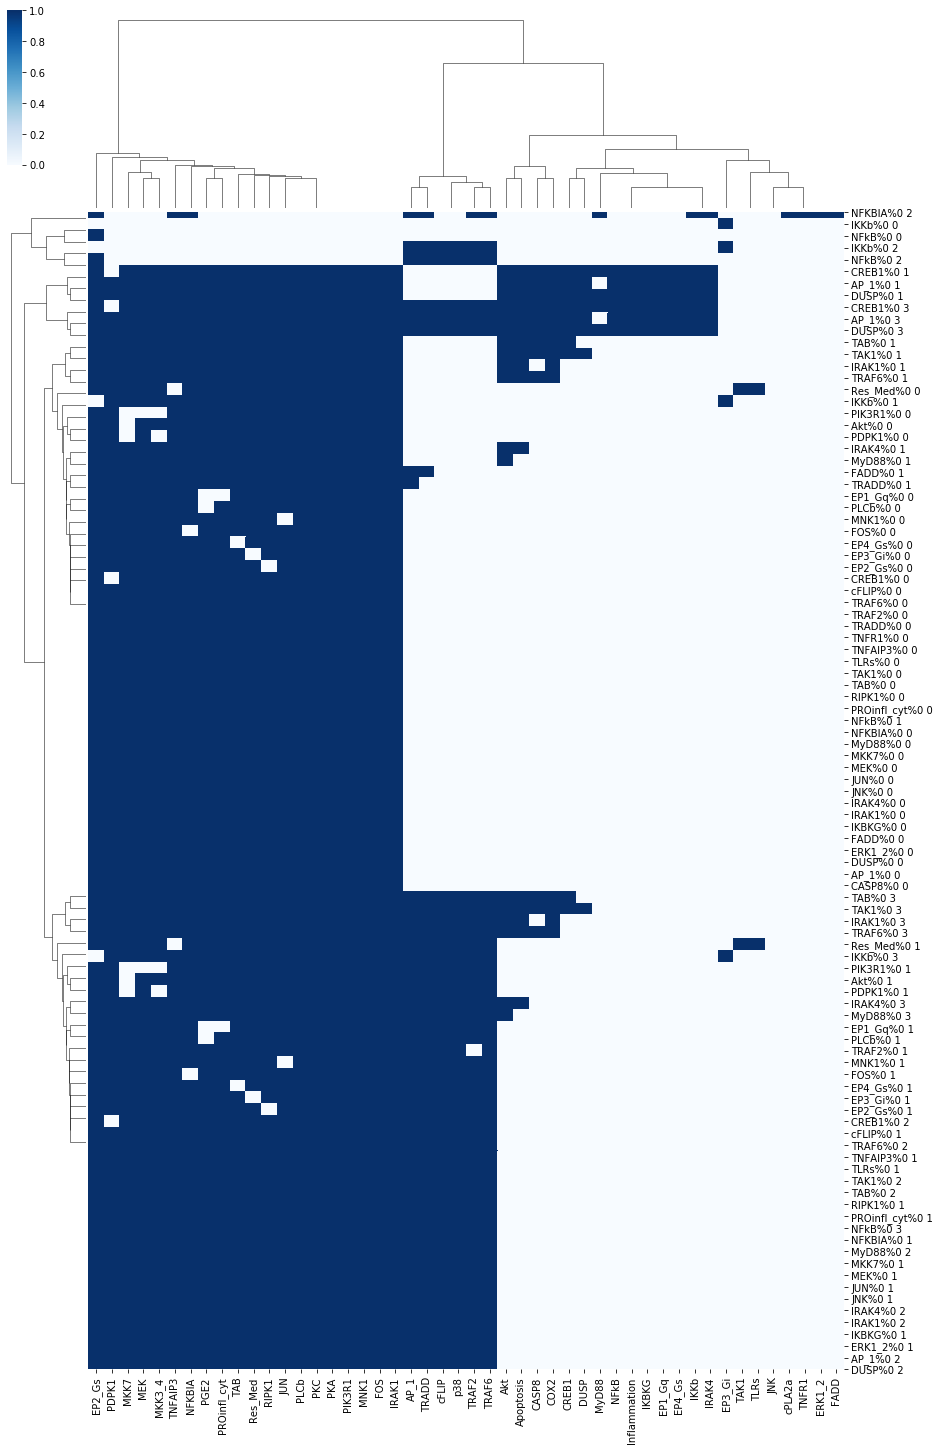

In [8]:
import seaborn as sns

'''List of perturbations with the nb of stable states '''
perturbstates=[]
trappedstates=[]

'''List of table state values same order as perturbStates'''
stablestates = [] 
tstates = [] 

'''List of nodes'''
nodelist = ["AP_1", "Akt", "Apoptosis", "CASP8", "COX2", "CREB1", "DUSP", "EP1_Gq", "EP2_Gs", "EP3_Gi", "EP4_Gs", "ERK1_2", "FADD", "FOS", "IKBKG", "IKKb", "IRAK1", "IRAK4", "Inflammation", "JNK", "JUN", "MEK", "MKK3_4", "MKK7", "MNK1", "MyD88", "NFKBIA", "NFkB", "PDPK1", "PGE2", "PIK3R1", "PKA", "PKC", "PLCb", "PROinfl_cyt", "RIPK1", "Res_Med", "TAB", "TAK1", "TLRs", "TNFAIP3", "TNFR1", "TRADD", "TRAF2", "TRAF6", "cFLIP", "cPLA2a", "p38"]

for k,v in fixpointlist.items():   
    for i in range(0,len(v)):
        listSS = []
        for key, val in v[i].items():
            listSS.append(val)
        stablestates.append(listSS)
        perturbstates.append(str(k)+' '+str(i))

'''Create dataframe: columns = nodes, rows = perturbations'''
df = DataFrame(data=stablestates)
df.columns = nodelist
df.index = perturbstates

'''Generate clustered heatmap'''
cm = sns.clustermap(df, metric='euclidean', cmap = 'Blues',  figsize=(15, 25))

Text(0.5, 0.98, 'Clustered heatmap of each cyclic attractors found for perturbations not leading to a stable state')

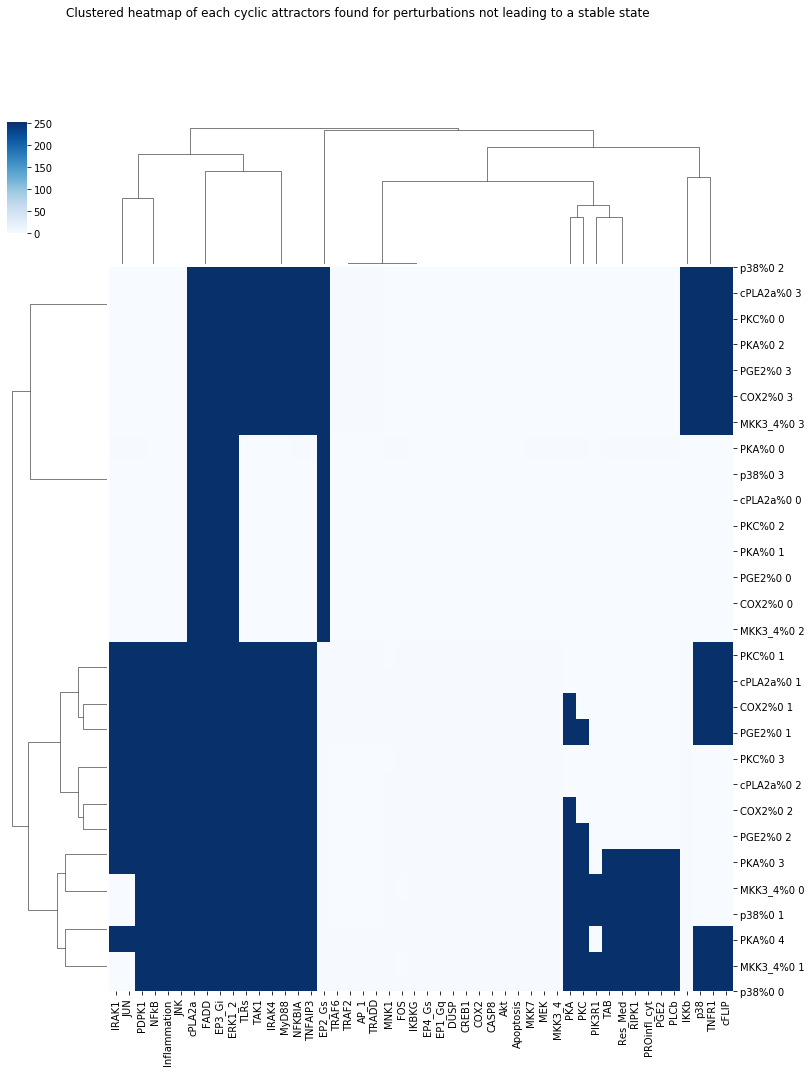

In [9]:
'''Repeat previous analysis for the trap space data'''
for k,v in trapspacelist.items():   
    for i in range(0,len(v)):
        listSS = []
        for key, val in v[i].items():
            if val == 255:
                val = 5
            listSS.append(val)
        tstates.append(listSS)
        trappedstates.append(str(k)+' '+str(i))

'''List of nodes in the trap space: multi valued components are expanded into several nodes'''        
nodelistT = ["AP_1", "Akt", "Apoptosis", "CASP8", "COX2", "CREB1", "DUSP", "EP1_Gq", "EP2_Gs", "EP3_Gi", "EP4_Gs", "ERK1_2", "FADD", "FOS", "IKBKG", "IKKb", "IRAK1", "IRAK4", "Inflammation", "JNK", "JUN", "MEK", "MKK3_4", "MKK7", "MNK1", "MyD88", "NFKBIA", "NFkB", "PDPK1", "PGE2", "PIK3R1", "PKA", "PKC", "PLCb", "PROinfl_cyt", "RIPK1", "Res_Med", "TAB", "TAK1", "TLRs", "TNFAIP3", "TNFR1", "TRADD", "TRAF2", "TRAF6", "cFLIP", "cPLA2a", "p38"]

df2 = DataFrame(data=tstates)
df2.columns = nodelistT
df2.index = trappedstates
cm2 = sns.clustermap(df2, metric='euclidean', cmap = 'Blues', yticklabels=True,  figsize=(13, 16))
cm2.fig.suptitle('Clustered heatmap of each cyclic attractors found for perturbations not leading to a stable state')

## Model validation through perturbations

**Paper**: [Toll-like receptor 4 signaling regulates cytosolic phospholipase A2 activation and lipid generation in lipopolysaccharide-stimulated macrophages.](https://www.ncbi.nlm.nih.gov/pubmed/16176925) 

**Perturbations:** 
- TLR4 inhibition results in inhibition of NFkB inhibition of cPLA2-mediated AA release
- TLR4 and MyD88 siRNAs decrease the phosphorylation of cPLA2, p38, and ERK
- ERK and p38 inhibition inhibits cPLA2-mediated AA release
- Inhibition of AKT does not inhibit phosphorylation of cPLA2 and arachidonic acid release

**Paper:** [TNF-α-Induced Apoptosis of Macrophages Following Inhibition of NF-κB: A Central Role for Disruption of Mitochondria](https://www.jimmunol.org/content/172/3/1907)

**Perturbations:**
- NfkB inhibition promotes TNF-a induced apoptosis

**Paper:** [Cytosolic Phospholipase A2 Regulates TNF-Induced Production of Joint Destructive Effectors in Synoviocytes](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0083555)

**Perturbations:**
- cPLA2 inhibition reduces levels of PGE2